In [235]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [236]:
df=pd.read_csv('train.csv')

In [237]:
df.sample(5)

,text,label
47908,Phils fire Bowa PHILADELPHIA - Larry Bowa took...,1
32705,O'Neal Returns to Practice for Pacers (AP) AP ...,1
83109,Continuous satellite launching successes fix C...,3
99189,Moss Doubtful for Sunday's Game Vs. Jaguars E...,1
99394,Nude Photo Publisher Perfect 10 Sues Google (R...,3


In [238]:
df.shape

(120000, 2)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    120000 non-null  object
 1   label   120000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [240]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [241]:
df.duplicated().sum()

0

In [242]:
df['label'].value_counts()

label
2    30000
3    30000
1    30000
0    30000
Name: count, dtype: int64

In [243]:
df['text'][119996]

"Renteria signing a top-shelf deal Red Sox general manager Theo Epstein acknowledged Edgar Renteria was more a luxury for the 2005 Red Sox than a necessity. But there's nothing wrong with getting the keys to a BMW, and that's what the four-time All-Star and two-time Gold Glover is in the eyes of the Red Sox."

In [244]:
df['text'][3]

'Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\\flows from the main pipeline in southern Iraq after\\intelligence showed a rebel militia could strike\\infrastructure, an oil official said on Saturday.'

In [245]:
df['text'][2043]

"Calif. Assembly Backs E-Mail Monitoring Disclosure (Reuters) Reuters - California's Assembly on Tuesday\\voted to require the state's employers to inform their workers\\in writing if e-mail and other Internet activity is monitored\\at work."

# Categories

In [246]:

#0==> World
#1==> Sports
#2==> Business
#3==> Technology


In [247]:
count=df['label'].value_counts()

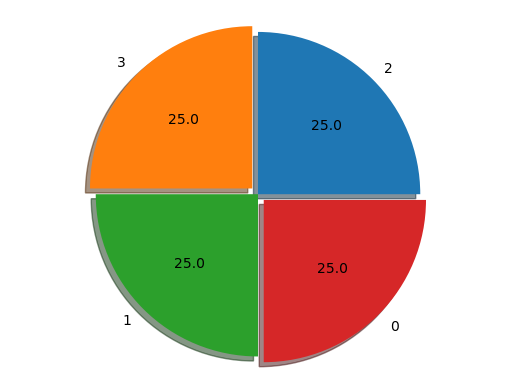

In [248]:
plt.pie(count,labels=count.index,autopct="%1.1f",explode=[0, 0.05, 0, 0.05],shadow="black")
plt.axis("equal")
plt.show()

# Cleaning of Text

In [249]:
df['text'][0]

"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."

# IMPORTING LIBRARIES

In [254]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import gensim
from gensim.models import Word2Vec,KeyedVectors
stopwords=set(stopwords.words('english'))
nltk.download('punkt_lab')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


[nltk_data] Error loading punkt_lab: Package 'punkt_lab' not found in
[nltk_data]     index
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [255]:
from nltk.stem import WordNetLemmatizer
# Functions
def strip_html(text):
    soap = BeautifulSoup(text, 'html.parser')
    return soap.get_text()

def remove_between_square_brackets(text):
    return re.sub(r'\[[^]]*\]', '', text)

def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

def apply_lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_stopwords(text):
    
    return ' '.join(word for word in text.split() if word not in stopwords)

def denoise_text(text):
    text = text.lower()
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    text = apply_lemmatizer(text)   # 👈 Now using Lemmatization
    text = remove_stopwords(text)
    return text



In [258]:
df['text']=df['text'].apply(denoise_text)

C:\Users\dell\AppData\Local\Temp\ipykernel_8528\2948977586.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soap = BeautifulSoup(text, 'html.parser')


In [259]:
df['text'][0]

'wall st bear claw back black reuters reuters shortsellers wall street dwindlingband ultracynics seeing green'

In [260]:
df.head(3)

,text,label
0,wall st bear claw back black reuters reuters s...,2
1,carlyle look toward commercial aerospace reute...,2
2,oil economy cloud stock outlook reuters reuter...,2


# Splitting of DataSet

In [36]:
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['label'],test_size=0.2,random_state=42)

# Vectorizing of the Text

In [40]:
tf=TfidfVectorizer()
x_train_tf=tf.fit_transform(x_train)
x_test_tf=tf.transform(x_test)
print(x_train_tf.shape)
print(x_test_tf.shape)

(96000, 71981)
(24000, 71981)


# Word2Vec

In [41]:
sentences=df['text'].apply(nltk.word_tokenize).tolist()

In [43]:
model=gensim.models.Word2Vec(window=10,min_count=2,workers=6)
model.build_vocab(sentences,progress_per=1000)
model.train(sentences ,total_examples=model.corpus_count,epochs =model.epochs)

(15166996, 15796330)

# Modeling 

# **LOGISTICREGRESIION**

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [108]:
lr=LogisticRegression(multi_class='multinomial',max_iter=500,penalty='l1',solver='saga')

In [109]:
lr.fit(x_train_tf,y_train)

D:\Semester\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\Semester\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', penalty='l1',
                   solver='saga')

In [110]:
y_predict_tf=lr.predict(x_test_tf)
accuracy_score(y_test,y_predict_tf)


0.9079583333333333

In [59]:
def get_avg_vector(tokens,model):
    vectors=[model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vectors,axis=0) if vectors else np.zeros(model.vector_size)
x=np.vstack([get_avg_vector(tokens,model) for tokens in sentences])    

In [65]:
X_train_wv, X_test_wv, y_train_wv, y_test_wv = train_test_split(
    x,df['label'], test_size=0.2, random_state=42
)

# Logistic Regression
clf = LogisticRegression(max_iter=800)
clf.fit(X_train_wv, y_train_wv)

print("Training Accuracy:", clf.score(X_train_wv, y_train_wv))
print("Test Accuracy:", clf.score(X_test_wv, y_test_wv))

Training Accuracy: 0.8871666666666667
Test Accuracy: 0.8887083333333333


# **RANDOM FOREST CLASSIFIER**

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
rd=RandomForestClassifier()
rd.fit(x_train_tf,y_train)
 
 

In [69]:
accuracy_score(y_test,y_predict_rd)

0.8942083333333334

In [70]:
 
rd.fit(X_train_wv, y_train_wv)

print("Training Accuracy:", rd.score(X_train_wv, y_train_wv))
print("Test Accuracy:", rd.score(X_test_wv, y_test_wv))

Training Accuracy: 0.99965625
Test Accuracy: 0.8926666666666667


# **XGBOOST**

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [92]:
xg=XGBClassifier()
xg.fit(x_train_tf,y_train)
y_predict_xg=xg.predict(x_test_tf)
accuracy_score(y_test,y_predict_xg)

0.889125

# **LightGBM**

In [94]:
lgb=LGBMClassifier()
lgb.fit(x_train_tf,y_train)
y_predict_lgb=lgb.predict(x_test_tf)
accuracy_score(y_test,y_predict_lgb)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.456906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 460590
[LightGBM] [Info] Number of data points in the train set: 96000, number of used features: 8327
[LightGBM] [Info] Start training from score -1.384463
[LightGBM] [Info] Start training from score -1.388714
[LightGBM] [Info] Start training from score -1.382593
[LightGBM] [Info] Start training from score -1.389424


0.8985416666666667

In [82]:
pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# HYPERPARAMETER TUNNING

### DUR TO MEMORY ISSUE I CANNOT USED BUT YOU CAN USED OPTUNA OR GRIDSEARCHCV OR RANDOMSEARCHCV

# WORD CLOUD

In [80]:
from wordcloud import WordCloud

# NEWS ABOUT WORLD

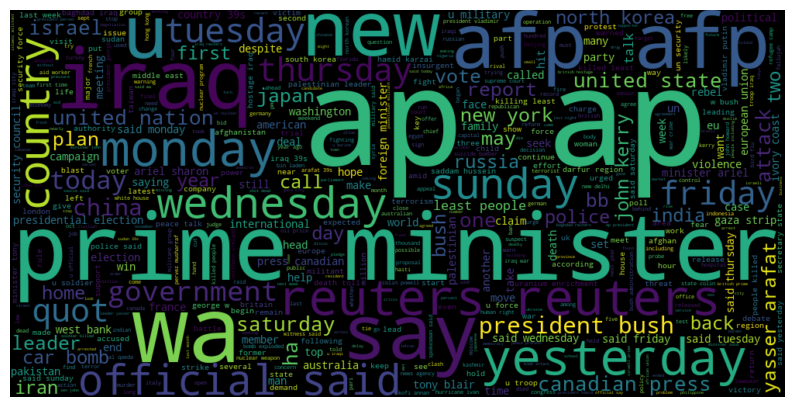

In [261]:
world= df[df['label'] == 0]

world_text = " ".join(review for review in world['text'])

WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5).generate(world_text)

plt.figure(figsize=(10,10))
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.show()


# NEWS ABOUT SPORTS

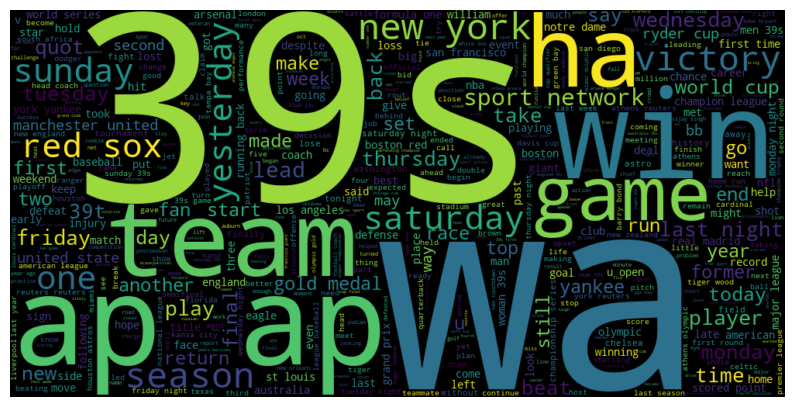

In [265]:
sports=df[df['label']==1]
sport_text=' '.join(review for review in sports['text'])
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5).generate(sport_text)
plt.figure(figsize=(10,10))
plt.imshow(WC,interpolation='bilinear')
plt.axis('off')
plt.show()

# NEWS ABOUT BUSINESS

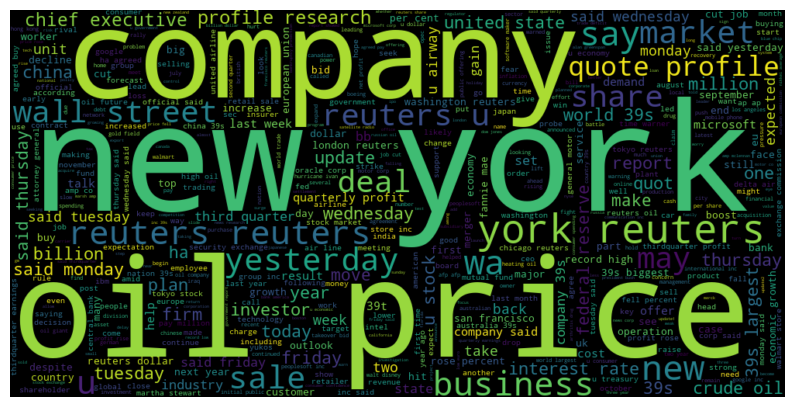

In [263]:
business=df[df['label']==2]
business_text=' '.join(review for review in business['text'])
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5).generate(business_text)
plt.figure(figsize=(10,10))
plt.imshow(WC,interpolation='bilinear')
plt.axis('off')
plt.show()

# NEWS ABOUT TECHNOLOGY

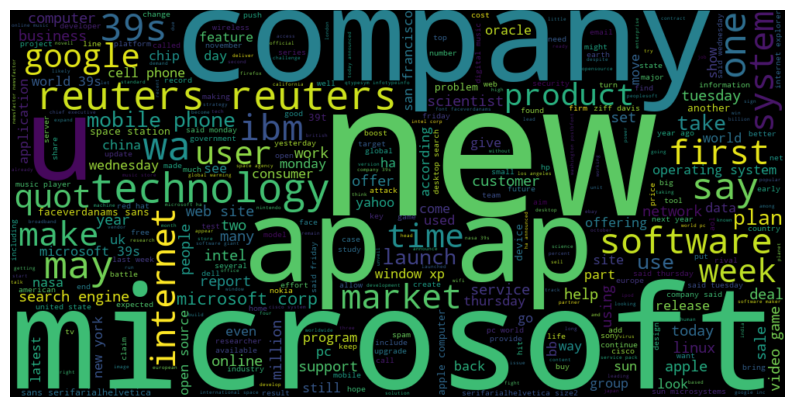

In [264]:
technology=df[df['label']==3]
tech_text=' '.join(review for review in technology['text'])
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5).generate(tech_text)
plt.figure(figsize=(10,10))
plt.imshow(WC,interpolation='bilinear')
plt.axis('off')
plt.show()

# LSTM OR GRU Neural Network

In [ ]:
 pip install tensorflow


In [198]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,GRU,Bidirectional,Embedding,Input,Dropout,Conv1D,GlobalMaxPooling1D
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [279]:
token=Tokenizer(num_words=40000)

In [280]:
token.fit_on_texts(df['text'])

In [281]:
len(token.index_word)

94762

In [282]:
seq=token.texts_to_sequences(df['text'])

In [283]:
X = pad_sequences(seq, maxlen=150, padding='post', truncating='post')

In [284]:
X.shape

(120000, 150)

In [285]:
y=df['label']

In [286]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [181]:
model=Sequential()
model.add(Input(shape=(150,)))
model.add(Embedding(input_dim=10000,output_dim=50))
model.add(LSTM(16))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [182]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 150, 50)        │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 16)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 504,356 (1.92 MB)

 Trainable params: 504,356 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 history=model1.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)

# **ANN**

In [191]:
model1=Sequential()
model1.add(Dense(128,input_dim=150,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model1.add(Dense(4,activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [192]:
model1.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 128)            │        19,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,844 (77.52 KB)

 Trainable params: 19,844 (77.52 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
history=model1.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.2713 - loss: 5.4429 - val_accuracy: 0.2514 - val_loss: 6.8589
Epoch 2/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.2805 - loss: 3.1435 - val_accuracy: 0.3019 - val_loss: 2.0466
Epoch 3/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.2929 - loss: 1.8210 - val_accuracy: 0.3154 - val_loss: 1.4431
Epoch 4/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.3106 - loss: 1.3943 - val_accuracy: 0.3238 - val_loss: 1.3874
Epoch 5/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.3110 - loss: 1.3756 - val_accuracy: 0.2715 - val_loss: 1.4159
Epoch 6/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.3002 - loss: 1.3763 - val_accuracy: 0.3062 - val_loss: 1.3854
Epoch 7/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.2909 - loss: 1.3771 - val_accuracy: 0.2985 - val_loss: 1.3801
Epoch 8/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.2869 - loss: 1

# **CONV1D**

In [289]:
model2 = Sequential()
model2.add(Input(shape=(150,)))
model2.add(Embedding(input_dim=40000, output_dim=50)) # Keep this
# Replace LSTM with Conv1D and GlobalMaxPooling
model2.add(Conv1D(32, 5, activation='relu')) # 32 filters, window size 5
model2.add(GlobalMaxPooling1D()) # Reduces the output to a single vector per filter
model2.add(Dropout(0.5))
model2.add(Dense(4, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)        │ (None, 150, 50)        │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 146, 32)        │         8,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,008,164 (7.66 MB)

 Trainable params: 2,008,164 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [290]:
history=model2.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 89s 29ms/step - accuracy: 0.8457 - loss: 0.4728 - val_accuracy: 0.9110 - val_loss: 0.2838
Epoch 2/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 89s 30ms/step - accuracy: 0.9141 - loss: 0.2828 - val_accuracy: 0.9119 - val_loss: 0.2816
Epoch 3/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 91s 30ms/step - accuracy: 0.9344 - loss: 0.2183 - val_accuracy: 0.9114 - val_loss: 0.2965
Epoch 4/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 94s 31ms/step - accuracy: 0.9461 - loss: 0.1741 - val_accuracy: 0.9088 - val_loss: 0.3179
Epoch 5/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 92s 31ms/step - accuracy: 0.9567 - loss: 0.1399 - val_accuracy: 0.9055 - val_loss: 0.3565


In [291]:
loss, acc = model2.evaluate(x_test, y_test)
print("Test Accuracy:", acc)

750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9055 - loss: 0.3565
Test Accuracy: 0.9054999947547913


# **SAVING THE MODEL**

In [227]:
model2.save("my_CONV1_model.keras")


# **Testing before Giving UI**

In [300]:
new_text = "Apple reports record-breaking profits in the latest quarter"
new_text=denoise_text(new_text)
seq = token.texts_to_sequences([new_text])
padded_seq = pad_sequences(seq, maxlen=150, padding='post',truncating='post')
pred = model2.predict(padded_seq)
print(pred)
pred_class = np.argmax(pred, axis=1)
print(pred_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[1.6302424e-02 5.0172963e-05 6.2105185e-01 3.6259559e-01]]
[2]


In [223]:
import pickle

In [225]:
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(token, f)